In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from scipy import stats
import seaborn as sns

Variables de entrada (basadas en pruebas fisicoquímicas):
1 - Acidez fija
2 - Acidez volátil
3 - Ácido cítrico
4 - Azúcar residual
5 - Cloruros
6 - Dióxido de azufre libre
7 - Dióxido de azufre total
8 - Densidad
9 - pH
10 - Sulfatos
11 - Alcohol 

In [6]:
ruta_archivo = 'winequality-red.csv'
ruta_archivo_modificado = 'wine_modificado.csv'
df = pd.read_csv(ruta_archivo, delimiter=';')
#df = pd.read_csv(ruta_archivo_modificado)



#df['quality'] = df['quality'].replace({3: 0, 4: 0, 5: 1, 6: 1, 7: 2, 8: 2})
#df.to_csv("wine.csv", index=False)

conteo_calida = df['quality'].value_counts()
print(len(df))
print(conteo_calida)
df

1599
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

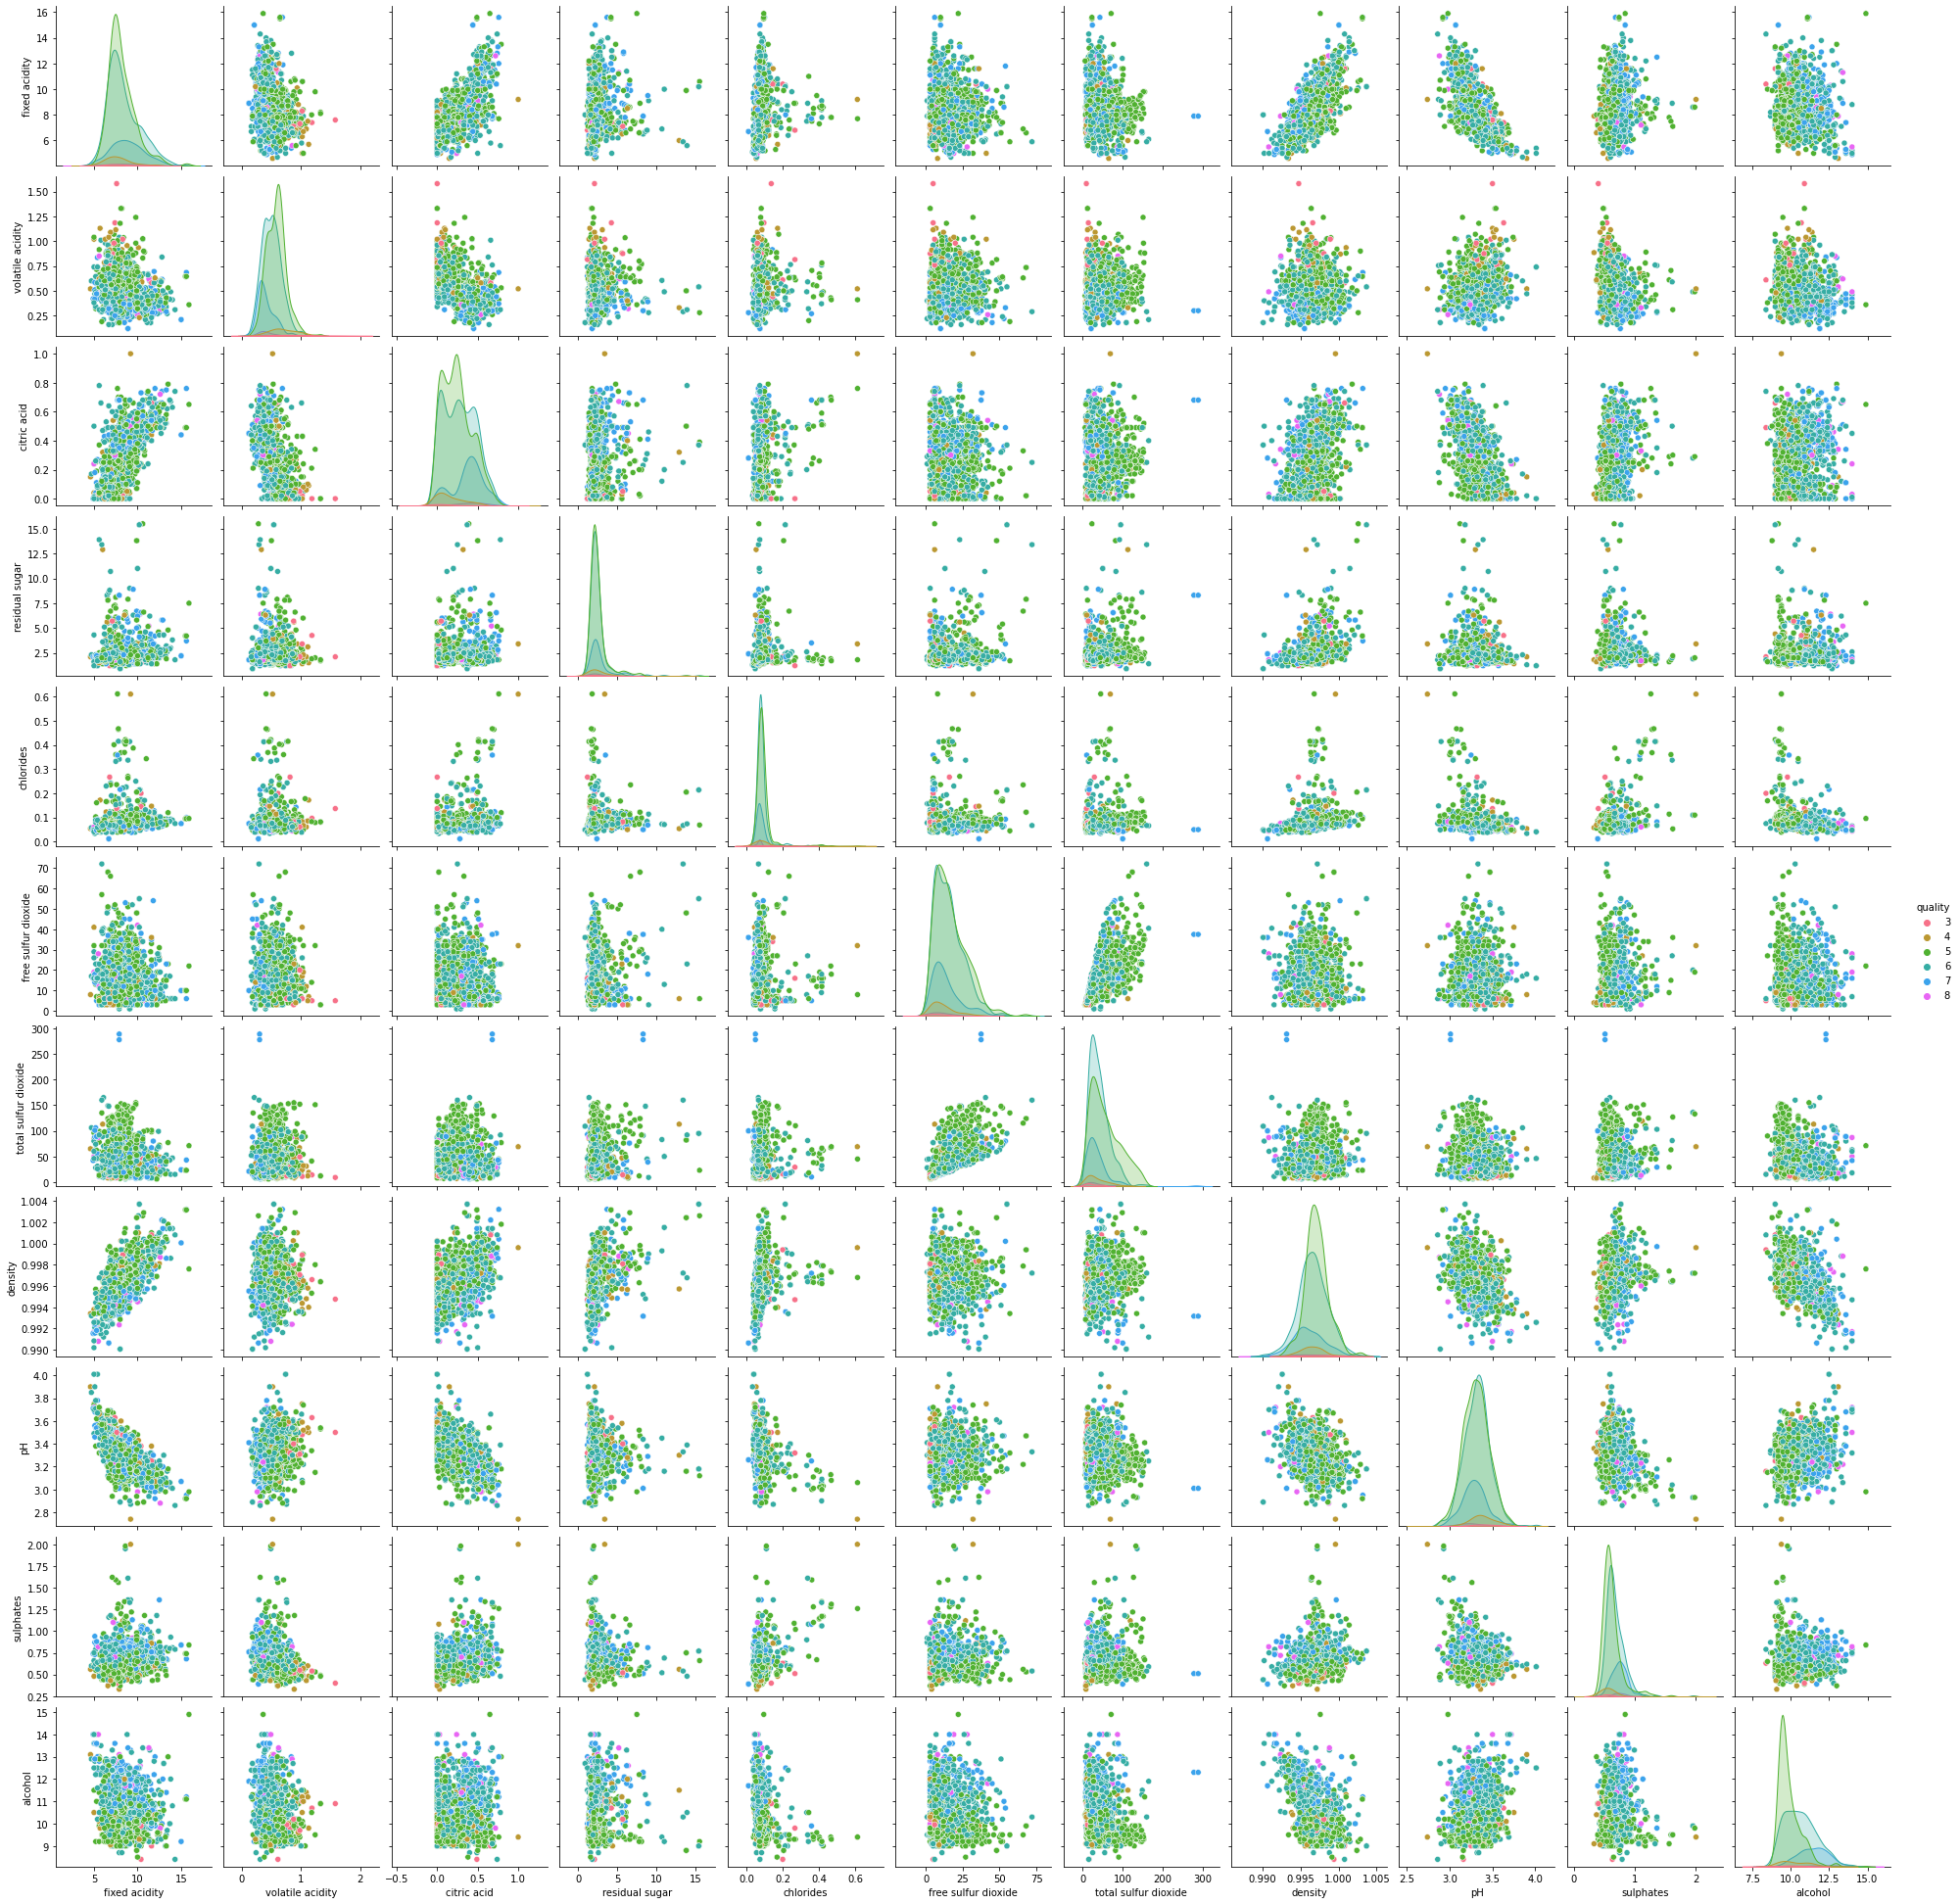

In [4]:
def generar_pairplot(df,nombre_columna_clases):
    """
    Genera un pairplot del DataFrame dado, con diferentes colores para cada nivel de la columna 'quality'.

    Parámetros:
    df (DataFrame): El DataFrame que contiene los datos de vino, debe tener una columna 'quality'.

    """
    # Definir una paleta de colores para asegurarnos de que cada clase de 'quality' tenga su propio color
    palette = sns.color_palette("husl", n_colors=len(df[nombre_columna_clases].unique()))
    
    # Crear el pairplot
    sns.pairplot(df, hue=nombre_columna_clases, palette=palette, diag_kind='kde')
    
    # Mostrar el gráfico
    plt.show()

# Llamar a la función pasando el DataFrame
generar_pairplot(df,'quality')

In [5]:
df_cp = pd.read_csv("wine_cp.csv")
df_cp["Calidad"] = df["quality"]
df_cp = df_cp.drop(columns=['CP11'])
df_cp = df_cp.drop(columns=['CP10'])

df_cp

CP1       CP2       CP3       CP4       CP5       CP6       CP7  \
0    -1.619530  0.450950 -1.774454  0.043740  0.067014 -0.913921 -0.161043   
1    -0.799170  1.856553 -0.911690  0.548066 -0.018392  0.929714 -1.009829   
2    -0.748479  0.882039 -1.171394  0.411021 -0.043531  0.401473 -0.539553   
3     2.357673 -0.269976  0.243489 -0.928450 -1.499149 -0.131017  0.344290   
4    -1.619530  0.450950 -1.774454  0.043740  0.067014 -0.913921 -0.161043   
...        ...       ...       ...       ...       ...       ...       ...   
1594 -2.150500  0.814286  0.617063  0.407687 -0.240936  0.054835  0.170812   
1595 -2.214496  0.893101  1.807402  0.414003  0.119592 -0.674711 -0.607970   
1596 -1.456129  0.311746  1.124239  0.491877  0.193716 -0.506410 -0.231082   
1597 -2.270518  0.979791  0.627965  0.639770  0.067735 -0.860408 -0.321487   
1598 -0.426975 -0.536690  1.628955 -0.391716  0.450482 -0.496154  1.189132   

           CP8       CP9  Calidad  
0    -0.282258  0.005098        5  
1     0.762587 -0.520707        5  
2     0.597946 -0.086857        5  
3    -0.455375  0.091577        6  
4    -0.282258  0.005098        5  
...        ...       ...      ...  
1594 -0.355866 -0.971524        5  
1595 -0.247640 -1.058135        6  
1596  0.079382 -0.808773        6  
1597 -0.468876 -0.612248        5  
1598  0.042176  0.404309        6  

[1599 rows x 10 columns]

In [22]:
import pandas as pd
from sklearn.utils import resample

# Supongamos que df es tu dataframe original cargado
# Ejemplo de un dataframe como el que mostraste:

df = pd.read_csv("wine_cp-so.csv")

# DataFrame con 3 clases
df_3_clases = df.copy()
df_3_clases['Calidad'] = df_3_clases['Calidad'].replace({3: 'Baja', 4: 'Baja', 5: 'Baja', 6: 'Media', 7: 'Alta', 8: 'Alta'})
print("Cantidad por clase en DF con 3 clases:")
print(df_3_clases['Calidad'].value_counts())

# DataFrame con 4 clases
df_4_clases = df.copy()
df_4_clases['Calidad'] = df_4_clases['Calidad'].replace({3: 'Clase 1', 4: 'Clase 1', 5: 'Clase 2', 6: 'Clase 3', 7: 'Clase 4', 8: 'Clase 4'})
print("\nCantidad por clase en DF con 4 clases:")
print(df_4_clases['Calidad'].value_counts())

# DataFrame con 2 clases
df_2_clases = df.copy()
df_2_clases['Calidad'] = df_2_clases['Calidad'].replace({3: 'Baja', 4: 'Baja', 5: 'Baja', 6: 'Alta', 7: 'Alta', 8: 'Alta'})
print("\nCantidad por clase en DF con 2 clases:")
print(df_2_clases['Calidad'].value_counts())

# DataFrame balanceado eliminando observaciones
df_min = df.groupby('Calidad').size().min()
df_balanceado = pd.concat([
    resample(df[df['Calidad'] == calidad], replace=False, n_samples=df_min, random_state=42)
    for calidad in df['Calidad'].unique()
])

print("\nCantidad por clase en DF balanceado:")
print(df_balanceado['Calidad'].value_counts())

# Guardar los DataFrames en archivos CSV
df_3_clases.to_csv('df_3_clases.csv', index=False)
df_4_clases.to_csv('df_4_clases.csv', index=False)
df_2_clases.to_csv('df_2_clases.csv', index=False)
df_balanceado.to_csv('df_balanceado.csv', index=False)

print("\nLos archivos CSV se han guardado correctamente.")


Cantidad por clase en DF con 3 clases:
Baja     593
Media    545
Alta     173
Name: Calidad, dtype: int64

Cantidad por clase en DF con 4 clases:
Clase 3    545
Clase 2    532
Clase 4    173
Clase 1     61
Name: Calidad, dtype: int64

Cantidad por clase en DF con 2 clases:
Alta    718
Baja    593
Name: Calidad, dtype: int64

Cantidad por clase en DF balanceado:
4    10
8    10
3    10
5    10
6    10
7    10
Name: Calidad, dtype: int64

Los archivos CSV se han guardado correctamente.


In [24]:
df_3_clases

CP1       CP2       CP3       CP4       CP5       CP6       CP7  \
0    -0.722438  0.504672 -1.747083 -0.639952  0.899131 -0.478413  1.213327   
1    -2.986674  0.319674 -2.429831  1.964230  0.794899  1.695108  0.141477   
2     0.350881  0.715680 -1.060004 -0.535166 -0.391368  0.184505  0.388695   
3    -4.278924 -1.274775  1.872697 -0.138925  1.287083 -0.591249  0.029621   
4    -0.146322  0.418086 -1.547347 -0.192320 -0.468707 -0.012315  0.143224   
...        ...       ...       ...       ...       ...       ...       ...   
1306 -2.150500  0.814286  0.617063  0.407687 -0.240936  0.054835  0.170812   
1307 -2.214496  0.893101  1.807402  0.414003  0.119592 -0.674711 -0.607970   
1308 -1.456129  0.311746  1.124239  0.491877  0.193716 -0.506410 -0.231082   
1309 -2.270518  0.979791  0.627965  0.639770  0.067735 -0.860408 -0.321487   
1310 -0.426975 -0.536690  1.628955 -0.391716  0.450482 -0.496154  1.189132   

           CP8       CP9 Calidad  
0     0.634695  0.115797    Baja  
1    -0.956757  0.418157    Baja  
2    -0.132609 -0.093180    Baja  
3    -1.538501  1.614260    Baja  
4    -0.152683  0.319621    Baja  
...        ...       ...     ...  
1306 -0.355866 -0.971524    Baja  
1307 -0.247640 -1.058135   Media  
1308  0.079382 -0.808773   Media  
1309 -0.468876 -0.612248    Baja  
1310  0.042176  0.404309   Media  

[1311 rows x 10 columns]

In [26]:
df = df_3_clases
df_baja = df[df['Calidad'] == 'Baja']
df_media = df[df['Calidad'] == 'Media']

# Calculamos el tamaño de un tercio de los datos
tercio_baja = int(len(df_baja) / 3)
tercio_media = int(len(df_media) / 3)

# Seleccionamos aleatoriamente un tercio de los datos
df_baja_reducido = df_baja.sample(n=tercio_baja, random_state=42)
df_media_reducido = df_media.sample(n=tercio_media, random_state=42)

# Filtramos las categorías que no son "Baja" ni "Media"
df_otras = df[~df['Calidad'].isin(['Baja', 'Media'])]

# Combinamos los datos
df_reducido = pd.concat([df_baja_reducido, df_media_reducido, df_otras])

# Mostramos el DataFrame resultante
print(df_reducido['Calidad'].value_counts())
df_reducido
df_reducido.to_csv('df_3_clases.csv', index=False)


Baja     197
Media    181
Alta     173
Name: Calidad, dtype: int64



Cantidad por clase en DF con 4 clases balanceado:
Clase 3    181
Clase 2    177
Clase 4    173
Clase 1     61
Name: Calidad, dtype: int64

El archivo CSV balanceado se ha guardado correctamente.


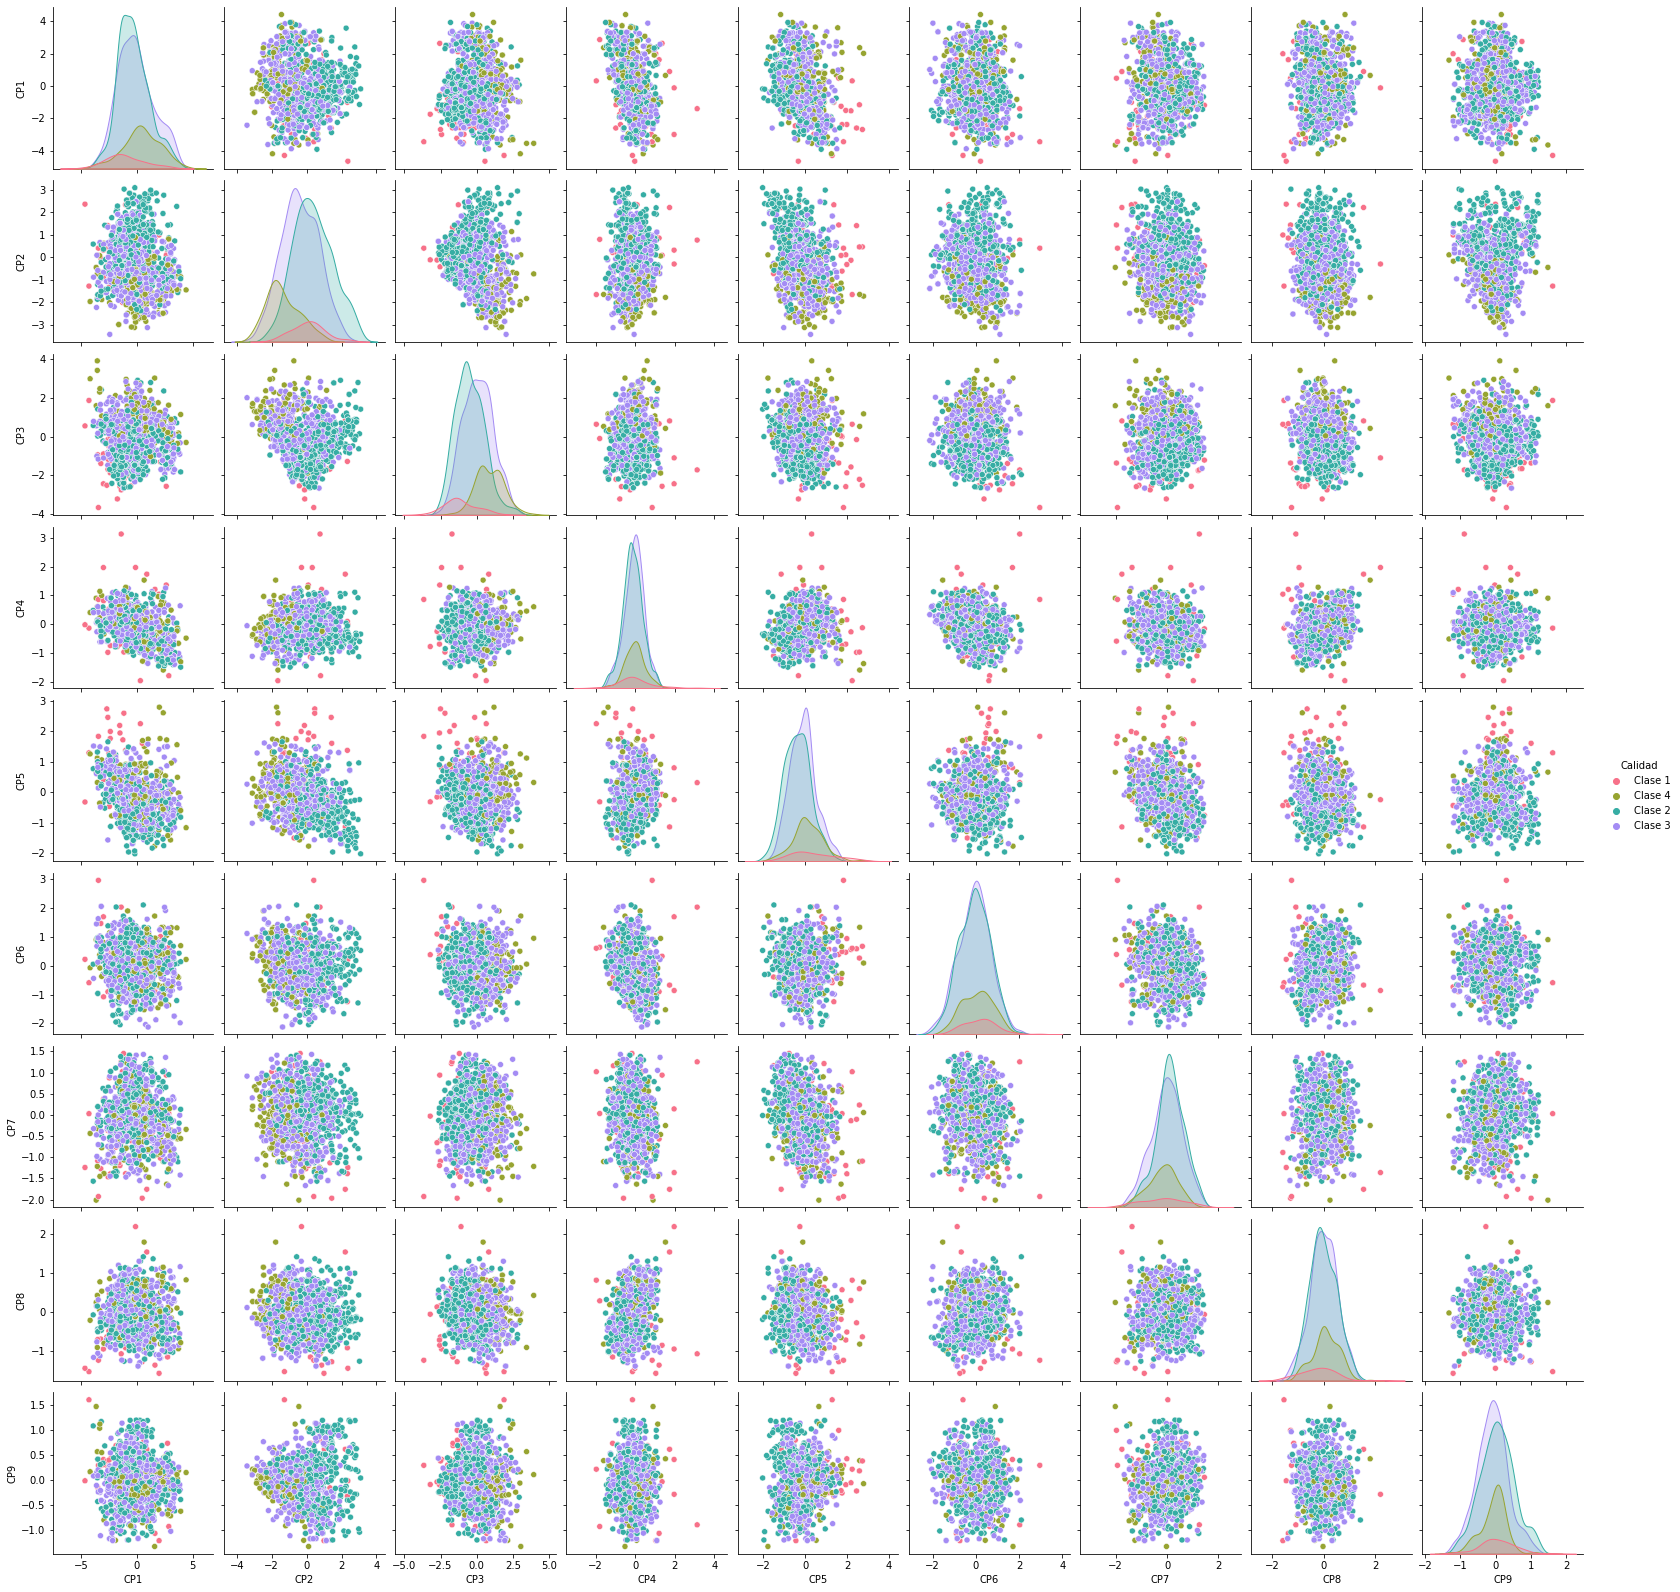

In [23]:
# Filtrar las clases que no necesitan ser reducidas
df_clase1_y_4 = df_4_clases[(df_4_clases['Calidad'] == 'Clase 1') | (df_4_clases['Calidad'] == 'Clase 4')]

# Reducir aleatoriamente las clases 2 y 3 a la mitad
df_clase2 = df_4_clases[df_4_clases['Calidad'] == 'Clase 2']
df_clase3 = df_4_clases[df_4_clases['Calidad'] == 'Clase 3']

# Resamplear a la mitad (usar n_samples = la mitad del tamaño original)
df_clase2_resampled = resample(df_clase2, replace=False, n_samples=len(df_clase2) // 3, random_state=42)
df_clase3_resampled = resample(df_clase3, replace=False, n_samples=len(df_clase3) // 3, random_state=42)

# Combinar los DataFrames de Clase 1, 2 (resampleada), 3 (resampleada) y 4
df_4_clases_balanceado = pd.concat([df_clase1_y_4, df_clase2_resampled, df_clase3_resampled])

# Imprimir el conteo final de cada clase
print("\nCantidad por clase en DF con 4 clases balanceado:")
print(df_4_clases_balanceado['Calidad'].value_counts())

# Guardar el nuevo DataFrame balanceado en un archivo CSV
df_4_clases_balanceado.to_csv('df_4_clases_balanceado.csv', index=False)

print("\nEl archivo CSV balanceado se ha guardado correctamente.")
df_4_clases.to_csv('df_4_clases.csv', index=False)

generar_pairplot(df_4_clases,'Calidad')

In [48]:
# Crear un DataFrame con solo las calidades 4, 5 y 6
df_intermedios = df[df['Calidad'].isin([4, 5, 6])].copy()

# Imprimir el conteo final de cada clase
print("\nCantidad por clase en DF con vinos de calidad 4, 5 y 6:")
print(df_intermedios['Calidad'].value_counts())

# Guardar el DataFrame en un archivo CSV
df_intermedios.to_csv('df_intermedios.csv', index=False)

print("\nEl archivo CSV con vinos de calidad 4, 5 y 6 se ha guardado correctamente.")




Cantidad por clase en DF con vinos de calidad 4, 5 y 6:
5    681
6    638
4     53
Name: Calidad, dtype: int64

El archivo CSV con vinos de calidad 4, 5 y 6 se ha guardado correctamente.


# Eliminar Out Layers RIQ

In [30]:
#df_RIQ.to_csv("wine_cp-RIQ-56.csv", index=False)

In [16]:
# Asumiendo que ya tienes cargado el DataFrame en una variable df
# Seleccionamos las columnas excepto 'quality'

#df_features = df.drop(columns=['quality'])
df_aux = df
df_features = df_aux.drop(columns=['Calidad'])
# Calculamos los cuartiles y el IQR
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

# Calculamos los límites superior e inferior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creamos una máscara booleana para seleccionar las filas sin outliers
mask = ~((df_features < lower_bound) | (df_features > upper_bound)).any(axis=1)

# Aplicamos la máscara para filtrar los datos
df_RIQ = df_aux[mask]

# Mostramos el DataFrame filtrado
print("Totales")
print(len(df_RIQ))
print("Eliminados")
print(len(df_features) - len(df_RIQ))
df_RIQ

conteo_calida = df_aux['Calidad'].value_counts()

print(conteo_calida)


Totales
1307
Eliminados
292
5    681
6    638
7    199
4     53
8     18
3     10
Name: Calidad, dtype: int64


In [21]:
# Hacemos una copia del DataFrame original
df_aux = df_DE.copy()

# Definimos el subconjunto de calidades que queremos filtrar
calidades_intermedias = [5, 6, 7]

# Filtramos los datos que pertenecen a las calidades 5, 6 y 7
df_intermedias = df_aux[df_aux['Calidad'].isin(calidades_intermedias)]

# Filtramos los datos que no pertenecen a esas calidades
df_no_intermedias = df_aux[~df_aux['Calidad'].isin(calidades_intermedias)]

# Eliminamos la columna 'Calidad' para calcular los outliers en el subconjunto de datos
df_features_intermedias = df_intermedias.drop(columns=['Calidad'])

# Calculamos los cuartiles y el IQR en el subconjunto de calidades intermedias
Q1 = df_features_intermedias.quantile(0.25)
Q3 = df_features_intermedias.quantile(0.75)
IQR = Q3 - Q1

# Calculamos los límites superior e inferior para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creamos una máscara booleana para seleccionar las filas sin outliers
mask = ~((df_features_intermedias < lower_bound) | (df_features_intermedias > upper_bound)).any(axis=1)

# Aplicamos la máscara para filtrar los datos intermedios sin outliers
df_intermedias_sin_outliers = df_intermedias[mask]

# Combinamos los datos sin outliers (solo en calidades intermedias) con los que no pertenecen a esas calidades
df_RIQ = pd.concat([df_no_intermedias, df_intermedias_sin_outliers])

# Mostramos el DataFrame filtrado
print("Totales después de eliminar outliers en calidades 5, 6 y 7:")
print(len(df_RIQ))
print("Datos eliminados (outliers de calidades 5, 6 y 7):")
print(len(df_aux) - len(df_RIQ))

# Ver el conteo de calidades después de eliminar outliers
conteo_calida = df_RIQ['Calidad'].value_counts()

print(conteo_calida)

# Mostrar el DataFrame resultante
df_RIQ.to_csv('wine_cp-so.csv', index=False)

Totales después de eliminar outliers en calidades 5, 6 y 7:
1311
Datos eliminados (outliers de calidades 5, 6 y 7):
245
6    545
5    532
7    155
4     51
8     18
3     10
Name: Calidad, dtype: int64


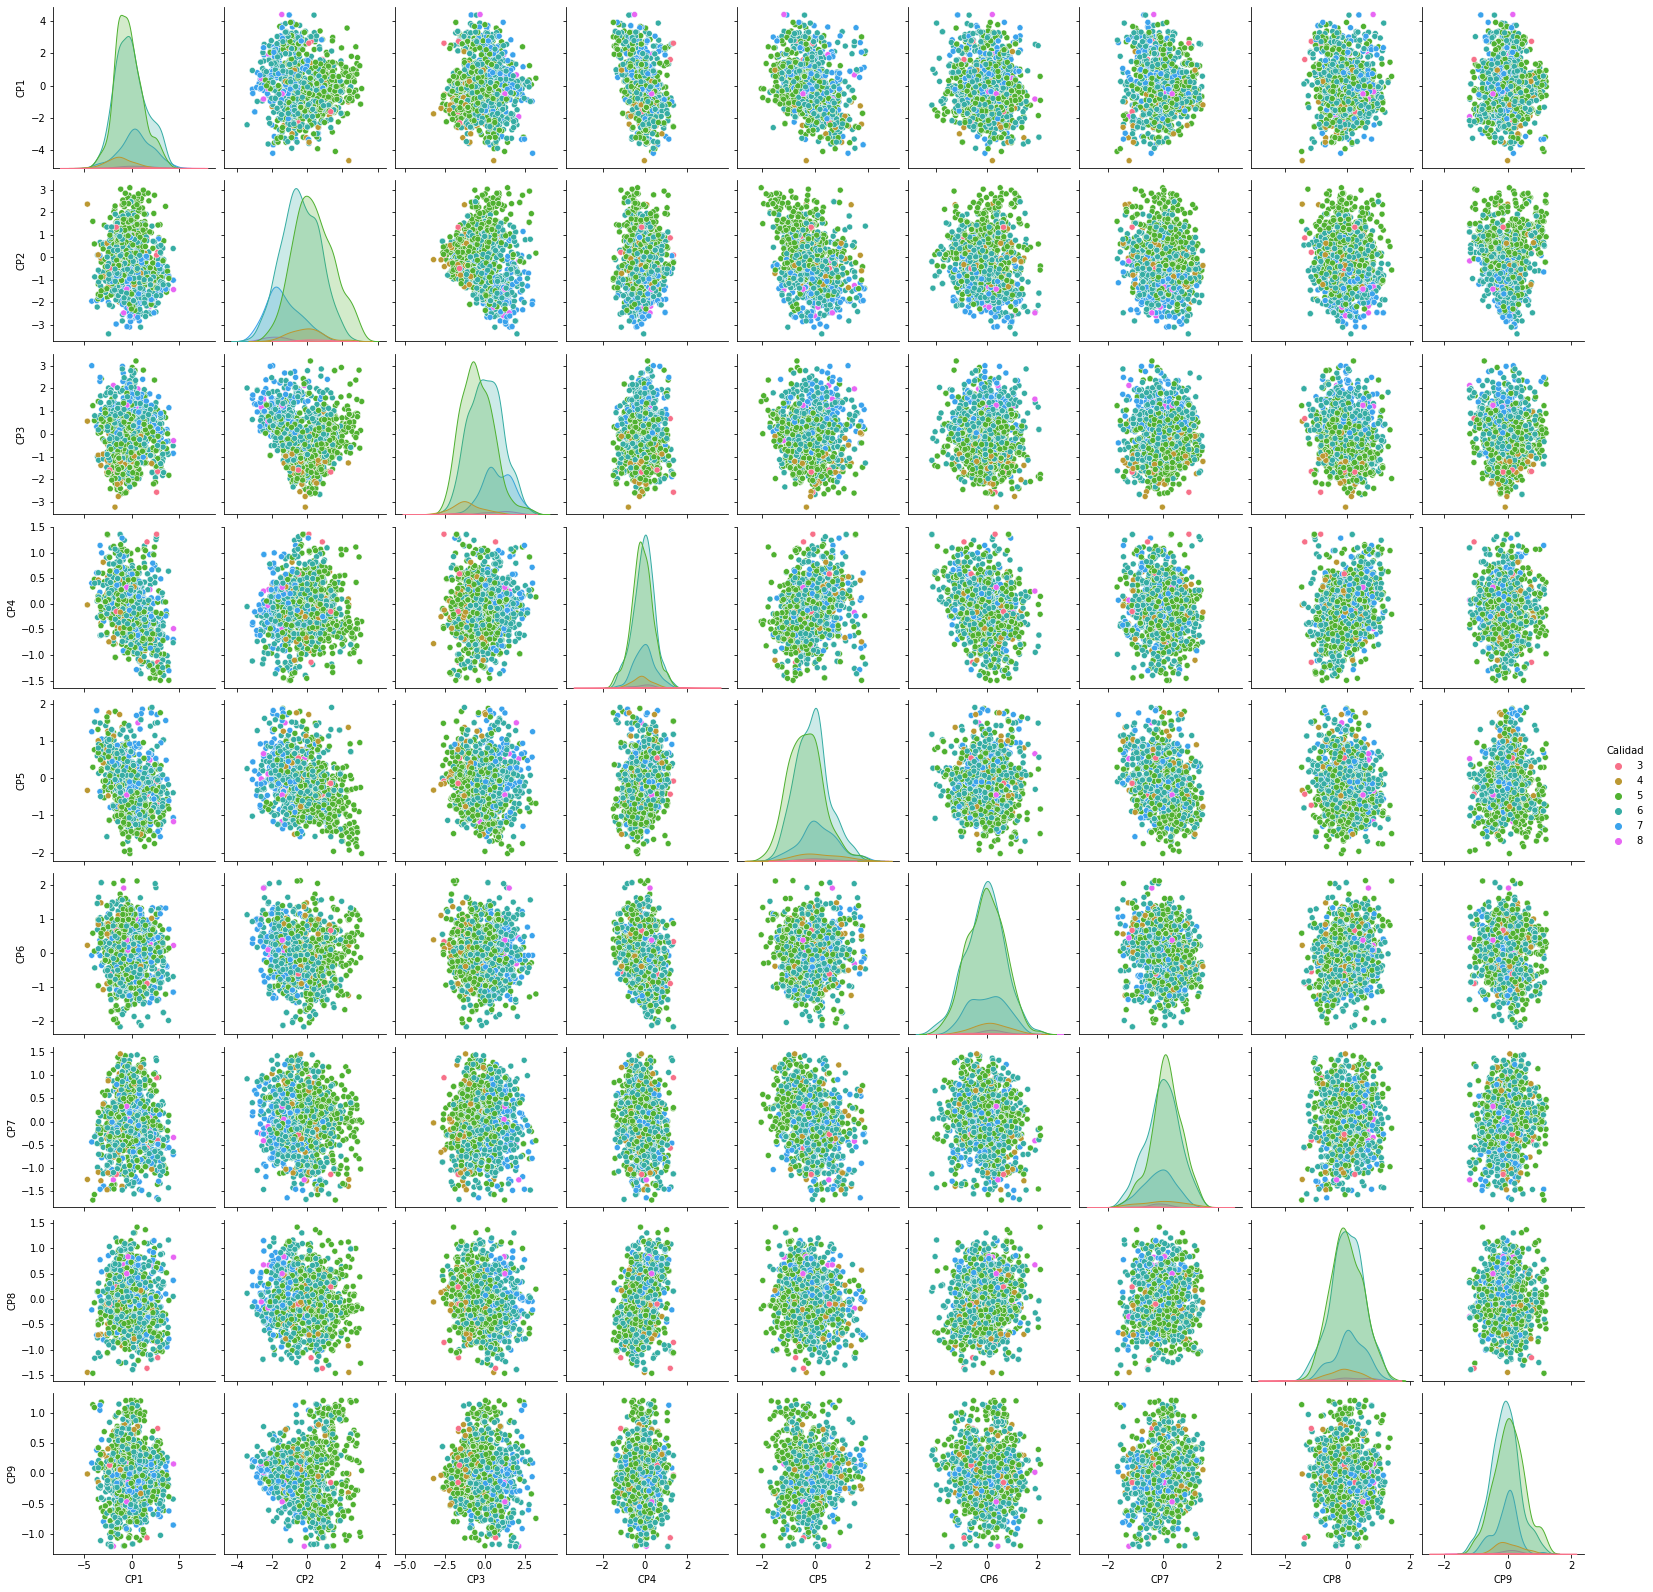

In [17]:
generar_pairplot(df_RIQ,'Calidad')

In [53]:
df_RIQ.to_csv('df_4_clases_SO.csv', index=False)


# Método de la desviación estándar para eliminar outLayers

In [19]:
# Definir el umbral de desviación estándar
umbral = 4

df_DE_final = df_cp
# Seleccionar solo las columnas numéricas excluyendo 'quality'
df_features = df_DE_final.drop(columns=['Calidad'])

# Calcular la media y la desviación estándar de cada columna
media = df_features.mean()
desviacion_std = df_features.std()

# Aplicar el filtro por cada columna
df_DE = df_DE_final[
    (np.abs(df_features - media) <= (umbral * desviacion_std)).all(axis=1)
]

print("Totales")
print(len(df_DE))
print("Eliminados")
print(len(df_features) - len(df_DE))
print(df_DE['Calidad'].value_counts())


Totales
1556
Eliminados
43
5    659
6    622
7    196
4     51
8     18
3     10
Name: Calidad, dtype: int64


## Conteo DF original  

In [12]:
def contar_calidad(df_prueba):
    conteo_calida = df_prueba['quality'].value_counts()
    print(len(df_prueba))
    print(conteo_calida)
print("Conteo calidad df original: ")
contar_calidad(df)
print("Conteo calidad df filtrado RIQ")
contar_calidad(df_RIQ)
print("Conteo calidad df fitrado por DE")
contar_calidad(df_DE)

Conteo calidad df original: 
1599
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64
Conteo calidad df filtrado RIQ


NameError: name 'df_RIQ' is not defined

# Conteo Df sin Out layers

# Anailisis Estadistico

In [7]:

def plot_histogram(column, column_name):
    # Calcular estadísticas
    mean = column.mean()
    mode = column.mode()[0]  # Puede haber más de una moda, tomar la primera
    std_dev = column.std()
    variance = column.var()
    
    # Calcular el coeficiente de variación (CV)
    if mean != 0:
        cv = (std_dev / mean) * 100  # Expresado como porcentaje
    else:
        cv = float('inf')  # Si la media es 0, el CV no se puede calcular
    
    # Crear el histograma
    plt.figure(figsize=(10, 6))
    sns.histplot(column, kde=True, bins=20, color='c', edgecolor='k', alpha=0.7)
    
    # Superponer líneas de media, moda y desviación estándar
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean:.2f}')
    plt.axvline(mode, color='green', linestyle='dotted', linewidth=2, label=f'Moda: {mode:.2f}')
    plt.axvline(mean + std_dev, color='blue', linestyle='dashdot', linewidth=2, label=f'+1 Desv. Estándar: {mean + std_dev:.2f}')
    plt.axvline(mean - std_dev, color='blue', linestyle='dashdot', linewidth=2, label=f'-1 Desv. Estándar: {mean - std_dev:.2f}')
    
    # Título y leyenda
    plt.title(f'Histograma de {column_name}', fontsize=15)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    
    # Mostrar la varianza y el CV en la leyenda
    plt.legend(title=f'Varianza: {variance:.4f}, CV: {cv:.2f}%')
    plt.grid(True)
    
    # Guardar el gráfico como imagen PNG
    file_name = f"histograma_{column_name}.png"
    plt.savefig(file_name)  # Guardar la imagen
    
    # Mostrar gráfico
    plt.tight_layout()
    plt.show()
    return plt  # Retornar el objeto plt



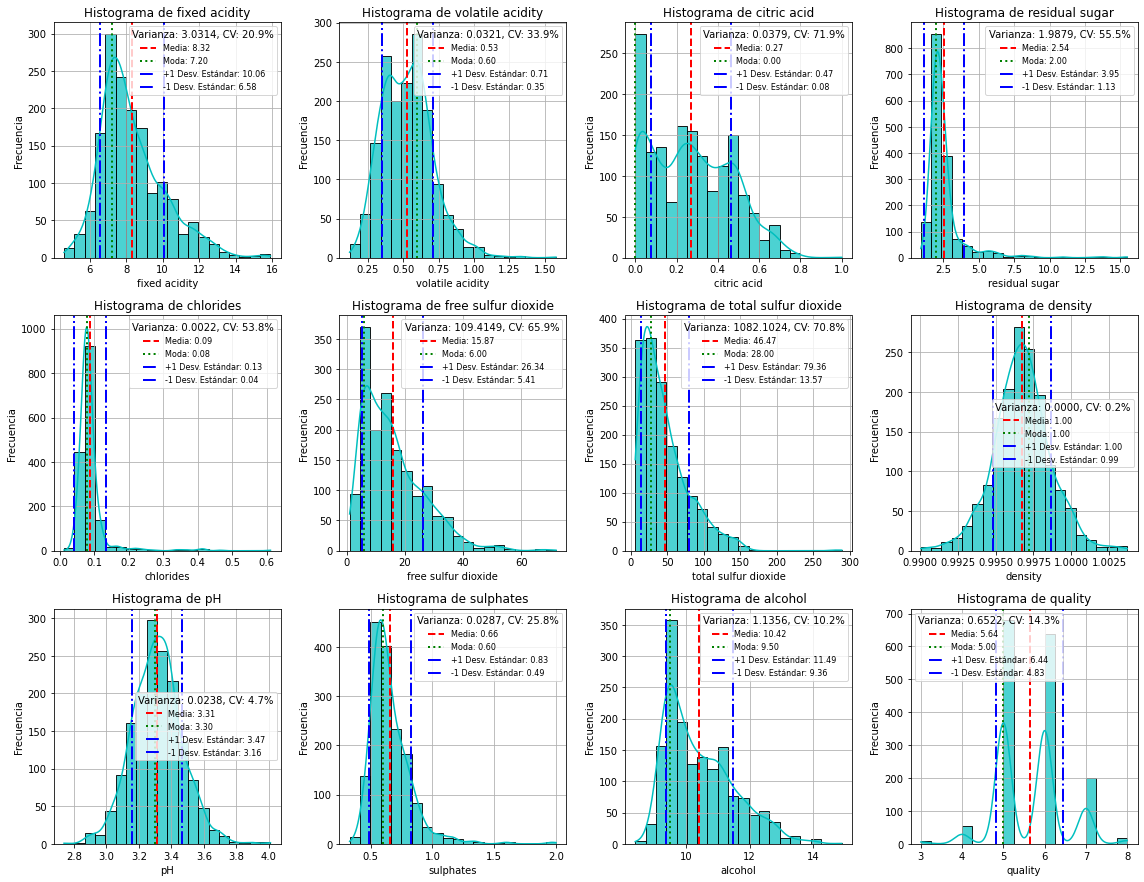

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_all_histograms_square(df):
    num_columns = len(df.columns)  # Número total de columnas
    
    # Calcular el tamaño de la cuadrícula (cuadrado lo más próximo posible)
    grid_size = math.ceil(math.sqrt(num_columns))  # Redondear hacia arriba la raíz cuadrada
    
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(16, 16))  # Crear la cuadrícula de subplots
    axes = axes.flatten()  # Aplanar los ejes para que sea más fácil iterar
    
    for i, column_name in enumerate(df.columns):
        column = df[column_name]
        
        # Calcular estadísticas
        mean = column.mean()
        mode = column.mode()[0]  # Puede haber más de una moda, tomar la primera
        std_dev = column.std()
        variance = column.var()
        
        # Calcular el coeficiente de variación (CV)
        if mean != 0:
            cv = (std_dev / mean) * 100  # Expresado como porcentaje
        else:
            cv = float('inf')  # Si la media es 0, el CV no se puede calcular
        
        # Crear el histograma en el subplot correspondiente
        sns.histplot(column, kde=True, bins=20, color='c', edgecolor='k', alpha=0.7, ax=axes[i])
        
        # Superponer líneas de media, moda y desviación estándar
        axes[i].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean:.2f}')
        axes[i].axvline(mode, color='green', linestyle='dotted', linewidth=2, label=f'Moda: {mode:.2f}')
        axes[i].axvline(mean + std_dev, color='blue', linestyle='dashdot', linewidth=2, label=f'+1 Desv. Estándar: {mean + std_dev:.2f}')
        axes[i].axvline(mean - std_dev, color='blue', linestyle='dashdot', linewidth=2, label=f'-1 Desv. Estándar: {mean - std_dev:.2f}')
        
        # Título y leyenda
        axes[i].set_title(f'Histograma de {column_name}', fontsize=12)
        axes[i].set_xlabel(column_name, fontsize=10)
        axes[i].set_ylabel('Frecuencia', fontsize=10)
        
        # Mostrar la varianza y el CV en la leyenda
        axes[i].legend(title=f'Varianza: {variance:.4f}, CV: {cv:.1f}%', fontsize=8)
        axes[i].grid(True)
    
    # Si hay más subplots que columnas, desactivar los subplots vacíos
    for j in range(i + 1, grid_size * grid_size):
        fig.delaxes(axes[j])
    
    # Ajustar el layout para que no se superpongan los gráficos
    plt.tight_layout()
    
    # Guardar el gráfico como imagen PNG
    plt.savefig('histogramas_dataframe_cuadrado.png')
    
    # Mostrar el gráfico
    plt.show()

# Ejemplo de uso
plot_all_histograms_square(df)

In [17]:

def plot_all_boxplots_square(df, class_column='quality'):
    num_columns = len(df.columns) - 1  # Restar 1 porque una columna es la clase
    
    # Calcular el tamaño de la cuadrícula (cuadrado lo más próximo posible)
    grid_size = math.ceil(math.sqrt(num_columns))  # Redondear hacia arriba la raíz cuadrada
    
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(16, 16))  # Crear la cuadrícula de subplots
    axes = axes.flatten()  # Aplanar los ejes para que sea más fácil iterar
    
    for i, column_name in enumerate(df.columns):
        if column_name == class_column:
            continue  # Saltar la columna de clases
        
        column = df[column_name]
        
        # Crear el boxplot en el subplot correspondiente, agrupado por la columna de clases
        sns.boxplot(x=df[class_column], y=column, ax=axes[i], palette='Set2', width=0.5)
        
        # Calcular estadísticas por cada clase
        for class_value in df[class_column].unique():
            class_data = df[df[class_column] == class_value][column_name]
            median = class_data.median()
            q1 = class_data.quantile(0.25)
            q3 = class_data.quantile(0.75)
            iqr = q3 - q1
            
            # Superponer línea de la mediana (una línea roja para cada clase)
            axes[i].axhline(median, color='red', linestyle='dashed', linewidth=2)
        
        # Título y leyenda
        axes[i].set_title(f'Boxplot de {column_name} por {class_column}', fontsize=12)
        axes[i].set_xlabel(class_column, fontsize=10)
        axes[i].set_ylabel(column_name, fontsize=10)
        
        axes[i].grid(True)
    
    # Si hay más subplots que columnas, desactivar los subplots vacíos
    for j in range(i + 1, grid_size * grid_size):
        fig.delaxes(axes[j])
    
    # Ajustar el layout para que no se superpongan los gráficos
    plt.tight_layout()
    
    # Guardar el gráfico como imagen PNG
    plt.savefig('boxplots_dataframe_clases.png')
    
    # Mostrar el gráfico
    plt.show()


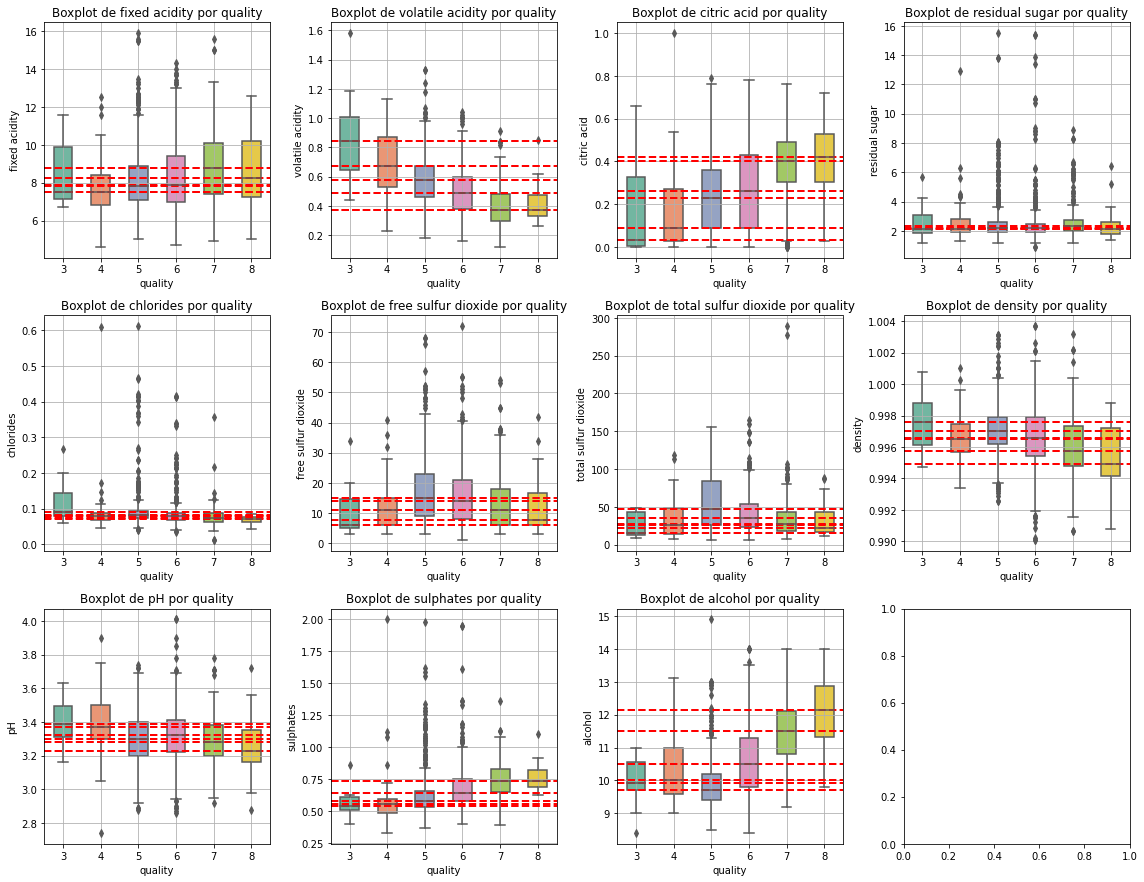

In [19]:
plot_all_boxplots_square(df) 

In [38]:
def shapiro_test_df(df, alpha=0.05):
    results = {
        'Nombre de la Variable': [],
        'p-valor': [],
        'Distribución Normal': []
    }
    
    for column in df.columns:
        # Aplicar la prueba de Shapiro-Wilk a la columna
        stat, p_value = stats.shapiro(df[column])
        
        # Decidir si rechazamos H_0 (distribución normal) o no
        if p_value > alpha:
            distribution_status = "Sí, sigue una distribución normal"
        else:
            distribution_status = "No, no sigue una distribución normal"
        
        # Guardar los resultados
        results['Nombre de la Variable'].append(column)
        results['p-valor'].append(p_value)
        results['Distribución Normal'].append(distribution_status)
    
    # Convertir el diccionario en un DataFrame para una mejor presentación
    results_df = pd.DataFrame(results)
    
    return results_df

# Ejemplo de uso:
shapiro_results = shapiro_test_df(df)
print(shapiro_results)

   Nombre de la Variable       p-valor                   Distribución Normal
0          fixed acidity  1.525595e-24  No, no sigue una distribución normal
1       volatile acidity  2.686807e-16  No, no sigue una distribución normal
2            citric acid  1.020820e-21  No, no sigue una distribución normal
3         residual sugar  0.000000e+00  No, no sigue una distribución normal
4              chlorides  0.000000e+00  No, no sigue una distribución normal
5    free sulfur dioxide  7.697398e-31  No, no sigue una distribución normal
6   total sulfur dioxide  3.574144e-34  No, no sigue una distribución normal
7                density  1.940096e-08  No, no sigue una distribución normal
8                     pH  1.713695e-06  No, no sigue una distribución normal
9              sulphates  5.821618e-38  No, no sigue una distribución normal
10               alcohol  6.643665e-27  No, no sigue una distribución normal
11               quality  9.504004e-36  No, no sigue una distribución normal

In [69]:
from sklearn.preprocessing import StandardScaler

def standardize(df):
    scaler = StandardScaler()
    standardized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return standardized_df
df_salida = standardize(df)
df_salida

from sklearn.preprocessing import MinMaxScaler

def normalize_min_max(df):
    # Separar la columna 'quality' del resto
    quality_column = df['quality']
    
    # Aplicar la normalización solo a las columnas que no son 'quality'
    scaler = MinMaxScaler()
    df_scaled = df.drop(columns=['quality'])
    df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled[df_scaled.columns])
    
    # Volver a agregar la columna 'quality' al DataFrame
    df_scaled['quality'] = quality_column
    
    return df_scaled



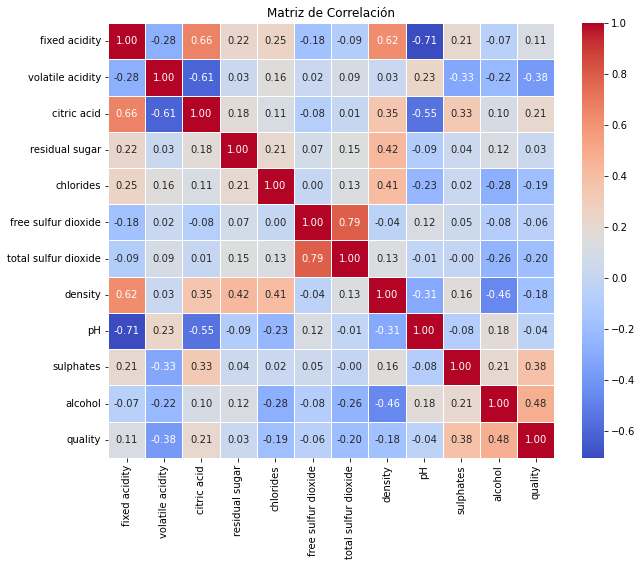

In [36]:
correlacion = df.corr(method='spearman')

# Crear el mapa de calor con seaborn
plt.figure(figsize=(10, 8))  # Ajustar el tamaño del gráfico
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title('Matriz de Correlación')
plt.show()


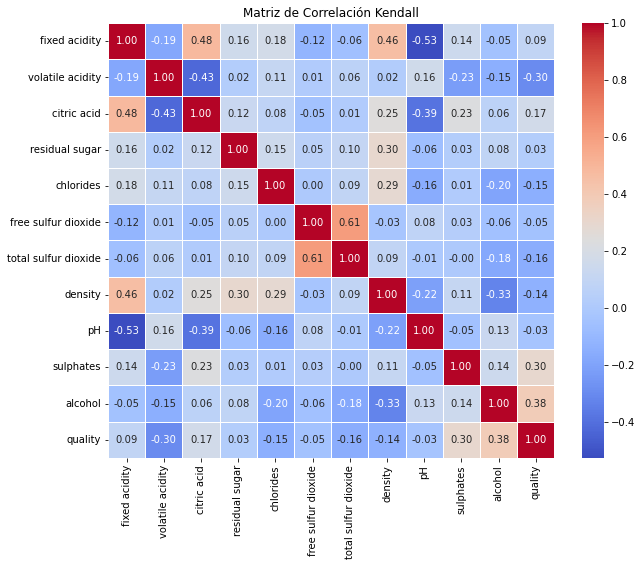

In [35]:
correlacion = df.corr(method='kendall')

# Crear el mapa de calor con seaborn
plt.figure(figsize=(10, 8))  # Ajustar el tamaño del gráfico
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title('Matriz de Correlación Kendall')
plt.show()


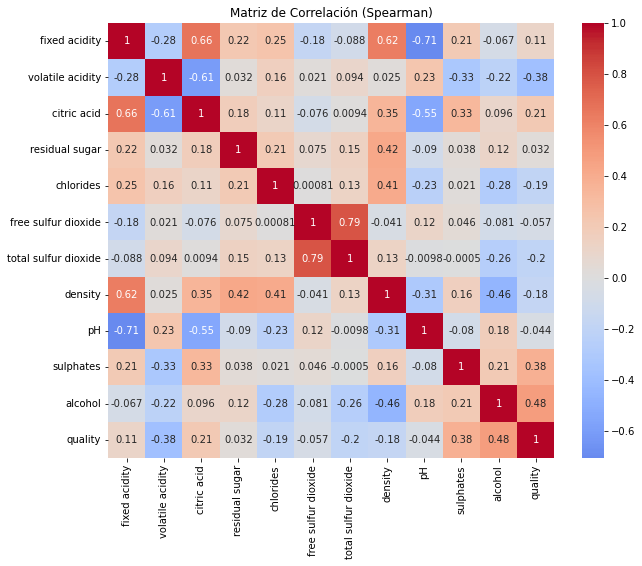

In [34]:
# Supongamos que df es tu DataFrame
correlacion_spearman = df.corr(method='spearman')

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_spearman, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación (Spearman)')
plt.show()

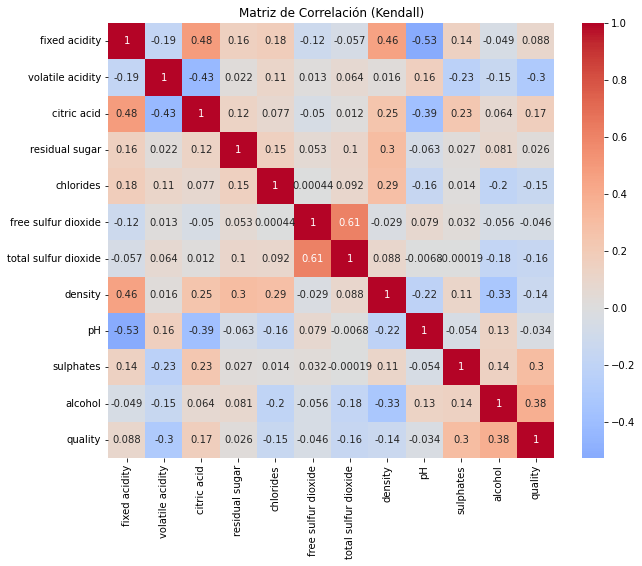

In [33]:
# Supongamos que df es tu DataFrame
correlacion_kendall = df.corr(method='kendall')

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_kendall, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación (Kendall)')
plt.show()

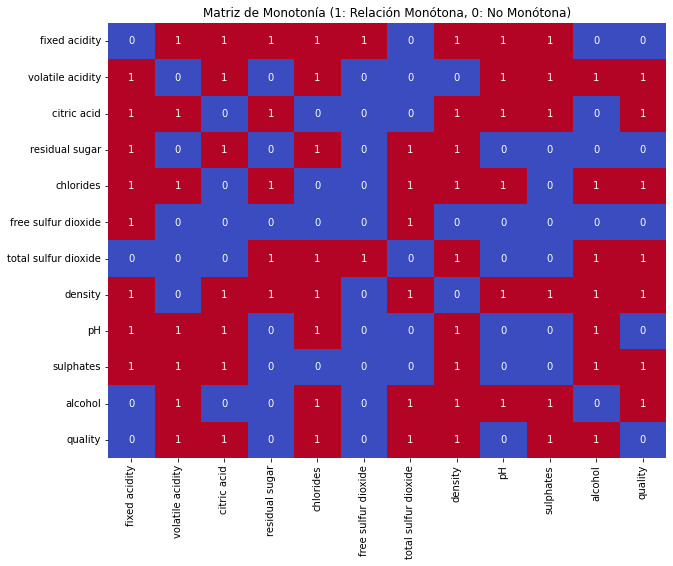

In [32]:
from scipy.stats import spearmanr
# Umbral para determinar si una correlación es monótona
umbral = 0.12
# Crear una matriz vacía para almacenar la monotonía (1 si es monótona, 0 si no)
matriz_monotonia = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), 
                                columns=df.columns, 
                                index=df.columns)

# Iterar sobre las variables y calcular el coeficiente de Spearman entre cada par
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:
            coef, p_value = spearmanr(df[col1], df[col2])
            # Verificar si el coeficiente está por encima o por debajo del umbral
            if abs(coef) >= umbral:
                matriz_monotonia.loc[col1, col2] = 1

# Visualización de la matriz de monotonía
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_monotonia, annot=True, cmap='coolwarm', cbar=False)
plt.title('Matriz de Monotonía (1: Relación Monótona, 0: No Monótona)')
plt.show()


In [125]:
df_scaled = standardize(df)

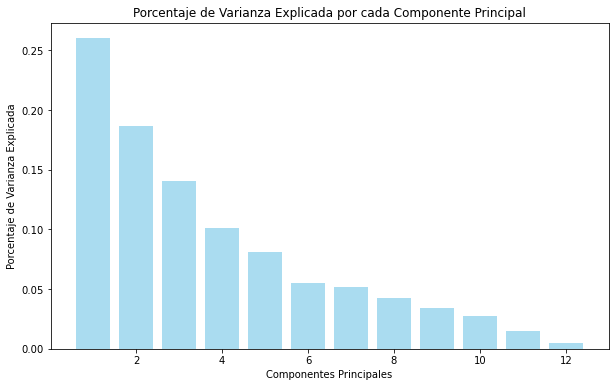

CP1: 26.01% de la varianza explicada
CP2: 18.68% de la varianza explicada
CP3: 14.02% de la varianza explicada
CP4: 10.13% de la varianza explicada
CP5: 8.11% de la varianza explicada
CP6: 5.52% de la varianza explicada
CP7: 5.15% de la varianza explicada
CP8: 4.22% de la varianza explicada
CP9: 3.43% de la varianza explicada
CP10: 2.73% de la varianza explicada
CP11: 1.50% de la varianza explicada
CP12: 0.50% de la varianza explicada


CP1       CP2       CP3       CP4       CP5       CP6       CP7  \
0    -1.779442  1.157303 -1.386581 -0.044944  0.233885 -0.976983 -0.110528   
1    -1.004185  2.071838  0.007759  0.466119  0.182454  0.657775 -1.376790   
2    -0.915783  1.393434 -0.699286  0.345292  0.095210  0.254823 -0.720338   
3     2.404077 -0.213792  0.066381 -0.889182 -1.524742 -0.132218  0.200660   
4    -1.779442  1.157303 -1.386581 -0.044944  0.233885 -0.976983 -0.110528   
...        ...       ...       ...       ...       ...       ...       ...   
1594 -2.241991  0.599594  0.795827  0.441059 -0.312981  0.130820  0.291926   
1595 -2.122456 -0.370101  2.138539  0.454564  0.104124 -0.751228 -0.436849   
1596 -1.366265 -0.517561  1.250696  0.514505  0.195916 -0.552162 -0.196039   
1597 -2.367147  0.703545  0.899482  0.661956  0.021380 -0.805753  0.126669   
1598 -0.288776 -1.240846  1.218095 -0.306325  0.231121 -0.202925  1.443414   

           CP8       CP9      CP10      CP11      CP12  
0     0.040320 -0.294420  0.073112 -0.262937  0.048362  
1    -0.176714  0.587342 -0.565736  0.048784 -0.139565  
2    -0.088687  0.546495 -0.162065 -0.199140 -0.120391  
3    -0.202816 -0.506212  0.241135 -0.107616  0.319764  
4     0.040320 -0.294420  0.073112 -0.262937  0.048362  
...        ...       ...       ...       ...       ...  
1594  0.137412 -0.421817 -1.016843  0.312767 -0.058920  
1595  0.181539 -0.413852 -0.992136  0.465027 -0.240933  
1596 -0.121154 -0.107569 -0.752854  0.235266 -0.402292  
1597  0.607400 -0.378298 -0.723453  0.737253  0.036187  
1598 -0.115422  0.165194  0.305877  0.777246 -0.449167  

[1599 rows x 12 columns]

In [126]:
# Aplicamos PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# Obtenemos la cantidad de varianza explicada por cada componente principal
varianza_explicada = pca.explained_variance_ratio_

# Creamos un DataFrame con los resultados del PCA
df_pca = pd.DataFrame(pca_result, columns=[f'CP{i+1}' for i in range(len(df_scaled.columns))])

# Graficar la varianza explicada por cada componente principal
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(varianza_explicada)+1), varianza_explicada, alpha=0.7, align='center', color='skyblue')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.title('Porcentaje de Varianza Explicada por cada Componente Principal')
plt.show()

# Imprimir el porcentaje de varianza explicada por cada componente
for i, var in enumerate(varianza_explicada):
    print(f'CP{i+1}: {var * 100:.2f}% de la varianza explicada')

# Devolver el DataFrame con los componentes principales
df_pca

In [46]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suponiendo que ya tienes tu DataFrame df cargado

# Separar las variables independientes y el objetivo
X = df.drop(columns=["quality"])  # Variables predictoras
y = df["quality"]  # Variable objetivo

# Añadir constante para el cálculo del VIF
X_const = sm.add_constant(X)

# Función para calcular el VIF
def calcular_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Primer cálculo del VIF
vif_antes = calcular_vif(X_const)

# Imprimir las variables con VIF mayor a 10
print("VIF > 10")
print(vif_antes[vif_antes["VIF"] > 10])
print("VIF > 5")
print(vif_antes[vif_antes["VIF"] > 5])
# Imprimir las variables con VIF mayor a 10

VIF > 10
  feature           VIF
0   const  1.710538e+06
VIF > 5
         feature           VIF
0          const  1.710538e+06
1  fixed acidity  7.767512e+00
8        density  6.343760e+00


# Regresion logistica multimodal

### Preparar DF

In [90]:
# Supongamos que tu DataFrame se llama df
# Seleccionar datos con calidad 5 y calidad 6
quality_5 = df[df['quality'] == 5]
quality_6 = df[df['quality'] == 6]

# Eliminar aleatoriamente la mitad de los datos con calidad 5 y calidad 6
quality_5_reduced = quality_5.sample(frac=0.5, random_state=42)
quality_6_reduced = quality_6.sample(frac=0.5, random_state=42)

# Eliminar las filas seleccionadas aleatoriamente del DataFrame original
df_reduced = df.drop(quality_5_reduced.index).drop(quality_6_reduced.index)
df = normalize_min_max(df_reduced)
# Eliminar segun el VIF
df = df.drop(columns=["density"]) 
df = df.drop(columns=["fixed acidity"]) 
df

volatile acidity  citric acid  residual sugar  chlorides  \
1             0.520548         0.00        0.116438   0.143813   
4             0.397260         0.00        0.068493   0.107023   
5             0.369863         0.00        0.061644   0.105351   
6             0.328767         0.06        0.047945   0.095318   
7             0.363014         0.00        0.020548   0.088629   
...                ...          ...             ...        ...   
1589          0.414384         0.20        0.472603   0.102007   
1590          0.294521         0.15        0.061644   0.108696   
1591          0.424658         0.09        0.054795   0.128763   
1594          0.328767         0.08        0.075342   0.130435   
1595          0.294521         0.10        0.089041   0.083612   

      free sulfur dioxide  total sulfur dioxide        pH  sulphates  \
1                0.338028              0.215548  0.362205   0.209581   
4                0.140845              0.098940  0.606299   0.137725   
5                0.169014              0.120141  0.606299   0.137725   
6                0.197183              0.187279  0.440945   0.077844   
7                0.197183              0.053004  0.511811   0.083832   
...                   ...                   ...       ...        ...   
1589             0.394366              0.257951  0.433071   0.125749   
1590             0.352113              0.102473  0.456693   0.293413   
1591             0.211268              0.070671  0.732283   0.137725   
1594             0.436620              0.134276  0.559055   0.149701   
1595             0.535211              0.159011  0.614173   0.257485   

       alcohol  quality  
1     0.250000        5  
4     0.178571        5  
5     0.178571        5  
6     0.178571        5  
7     0.285714        7  
...        ...      ...  
1589  0.142857        5  
1590  0.571429        6  
1591  0.571429        6  
1594  0.375000        5  
1595  0.500000        6  

[940 rows x 10 columns]

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [92]:
x = df.drop(columns=["quality"])  # Variables predictoras
y = df["quality"]  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


### Construir el modelo de regresión logística:

In [113]:

# Entrenar el modelo de regresión logística
modelo = LogisticRegression(max_iter=10000)
modelo.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

def logistic_regression_model(df, target_col, test_size=0.3, random_state=42):
    # Separar variables predictoras y objetivo
    features = df.columns.drop(target_col)
    X = df[features]
    y = df[target_col]

    # Binarizar el target para usar en la curva ROC
    y_binarized = label_binarize(y, classes=np.unique(y))
    n_classes = y_binarized.shape[1]

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=test_size, random_state=random_state)

    # Estandarizar las variables
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Construir el modelo de regresión logística multinomial con OneVsRestClassifier
    model = OneVsRestClassifier(LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))
    model.fit(X_train_scaled, y_train)

    # Realizar predicciones
    y_pred = model.predict(X_test_scaled)
    y_score = model.decision_function(X_test_scaled)

    # Calcular métricas
    accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
    precision = precision_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
    recall = recall_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
    f1 = f1_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')

    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

    # Importancia de las variables
    importance = pd.DataFrame({
        'Feature': features,
        'Importance': np.abs(model.estimators_[0].coef_).mean(axis=0)
    }).sort_values(by='Importance', ascending=False)

    # Calcular la curva ROC para cada clase
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Graficar las curvas ROC
    plt.figure(figsize=(10, 8))
    colors = plt.cm.get_cmap('tab10', n_classes)  # Usar colormap para colores
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=colors(i), lw=2,
                 label=f'ROC curve (class {i + 1}, area = {roc_auc[i]:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curvas ROC para cada clase')
    plt.legend(loc="lower right")
    plt.show()

    # Graficar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.title('Matriz de Confusión')
    plt.show()

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': conf_matrix,
        'importance': importance,
        'roc_auc': roc_auc
    }

In [115]:
df

volatile acidity  citric acid  residual sugar  chlorides  \
1             0.520548         0.00        0.116438   0.143813   
4             0.397260         0.00        0.068493   0.107023   
5             0.369863         0.00        0.061644   0.105351   
6             0.328767         0.06        0.047945   0.095318   
7             0.363014         0.00        0.020548   0.088629   
...                ...          ...             ...        ...   
1589          0.414384         0.20        0.472603   0.102007   
1590          0.294521         0.15        0.061644   0.108696   
1591          0.424658         0.09        0.054795   0.128763   
1594          0.328767         0.08        0.075342   0.130435   
1595          0.294521         0.10        0.089041   0.083612   

      free sulfur dioxide  total sulfur dioxide        pH  sulphates  \
1                0.338028              0.215548  0.362205   0.209581   
4                0.140845              0.098940  0.606299   0.137725   
5                0.169014              0.120141  0.606299   0.137725   
6                0.197183              0.187279  0.440945   0.077844   
7                0.197183              0.053004  0.511811   0.083832   
...                   ...                   ...       ...        ...   
1589             0.394366              0.257951  0.433071   0.125749   
1590             0.352113              0.102473  0.456693   0.293413   
1591             0.211268              0.070671  0.732283   0.137725   
1594             0.436620              0.134276  0.559055   0.149701   
1595             0.535211              0.159011  0.614173   0.257485   

       alcohol  quality  
1     0.250000        5  
4     0.178571        5  
5     0.178571        5  
6     0.178571        5  
7     0.285714        7  
...        ...      ...  
1589  0.142857        5  
1590  0.571429        6  
1591  0.571429        6  
1594  0.375000        5  
1595  0.500000        6  

[940 rows x 10 columns]

/home/roko/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


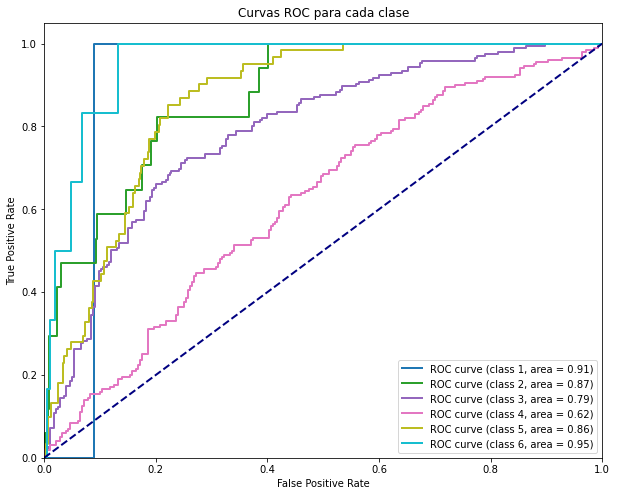

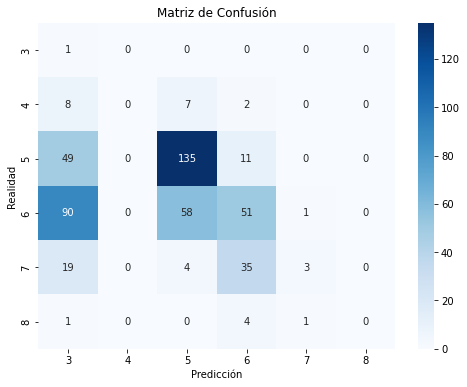

Precisión (Precision): 0.5514149921700072
Recall: 0.3958333333333333
F1-Score: 0.42674772657561166
Matriz de confusión:
[[  1   0   0   0   0   0]
 [  8   0   7   2   0   0]
 [ 49   0 135  11   0   0]
 [ 90   0  58  51   1   0]
 [ 19   0   4  35   3   0]
 [  1   0   0   4   1   0]]
Importancia de las variables:
                 Feature  Importance
6   total sulfur dioxide    0.749055
1       volatile acidity    0.663272
10               alcohol    0.484082
7                density    0.453333
8                     pH    0.394584
5    free sulfur dioxide    0.343562
4              chlorides    0.328853
9              sulphates    0.309410
0          fixed acidity    0.238316
2            citric acid    0.160361
3         residual sugar    0.089053


In [128]:
# Especifica el nombre de la columna objetivo
target_col = 'quality'

# Definir las variables predictoras (todas excepto la columna objetivo)
predictor_vars = df.columns.drop(target_col)
# Construir y evaluar el modelo de regresión logística
results = logistic_regression_model(df, target_col)

# Mostrar resultados
print(f"Precisión (Precision): {results['precision']}")
print(f"Recall: {results['recall']}")
print(f"F1-Score: {results['f1']}")
print(f"Matriz de confusión:\n{results['confusion_matrix']}")
print(f"Importancia de las variables:\n{results['importance']}")

/home/roko/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


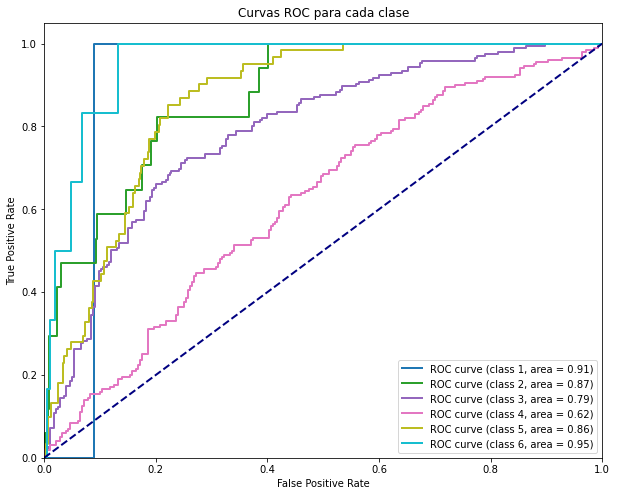

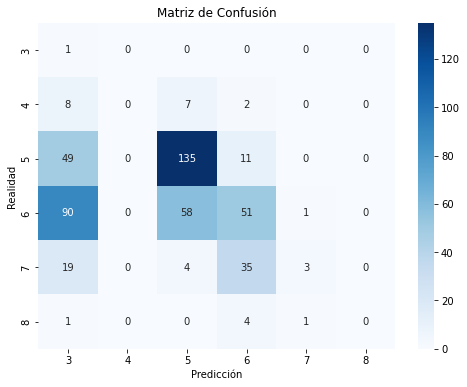

Precisión (Precision): 0.5514149921700072
Recall: 0.3958333333333333
F1-Score: 0.42674772657561166
Matriz de confusión:
[[  1   0   0   0   0   0]
 [  8   0   7   2   0   0]
 [ 49   0 135  11   0   0]
 [ 90   0  58  51   1   0]
 [ 19   0   4  35   3   0]
 [  1   0   0   4   1   0]]
Importancia de las variables:
                 Feature  Importance
6   total sulfur dioxide    0.749055
1       volatile acidity    0.663272
10               alcohol    0.484082
7                density    0.453333
8                     pH    0.394584
5    free sulfur dioxide    0.343562
4              chlorides    0.328853
9              sulphates    0.309410
0          fixed acidity    0.238316
2            citric acid    0.160361
3         residual sugar    0.089053


In [127]:
# Construir y evaluar el modelo de regresión logística
results = logistic_regression_model(df, target_col)

# Mostrar resultados
print(f"Precisión (Precision): {results['precision']}")
print(f"Recall: {results['recall']}")
print(f"F1-Score: {results['f1']}")
print(f"Matriz de confusión:\n{results['confusion_matrix']}")
print(f"Importancia de las variables:\n{results['importance']}")